# Experiment no 2: Implementation of Logistic Regression (AY: 2025-2026)
## Sarvesh Vikas Tikekar (2022120037)

In [1]:
"""Importing all the libraries first """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
""" Importing the csv data """

"""Link to the dataset: https://www.kaggle.com/datasets/trisha2094/weatheraus """

data = pd.read_csv('Datasets/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
""" Finding out the dtypes of all columns """

data.dtypes
data.drop(columns=['Date'], inplace=True)

In [4]:
# First 10 rows of dataset / DataFrame

data.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [5]:
# Finding Missing values in dataframe
data.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
missing_cols_data = data.isnull().sum()

""" Shows only the columns having null values """
missing_cols_data = missing_cols_data[missing_cols_data > 0]
missing_cols_data

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
dtype: int64

# Now we do visualisations for Distributions

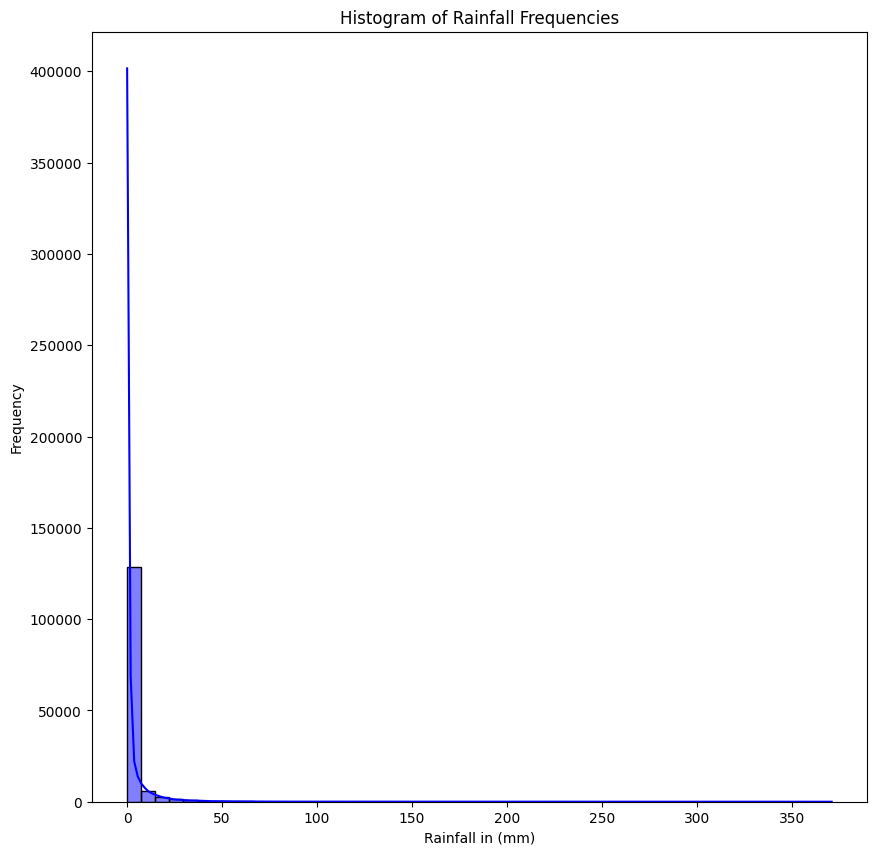

,Rainfall,RainTomorrow
0,0.6,No
1,0.0,No
2,0.0,No
3,0.0,No
4,1.0,No
...,...,...
142188,0.0,No
142189,0.0,No
142190,0.0,No
142191,0.0,No


In [7]:
# For rainfall

plt.figure(figsize=(10, 10))
sns.histplot(data['Rainfall'], kde=True, color='blue', bins=50)
plt.xlabel('Rainfall in (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Rainfall Frequencies')
plt.show()

# Fill null values using median

data.fillna({'Rainfall': data['Rainfall'].median()}, inplace=True)
data[['Rainfall', 'RainTomorrow']]

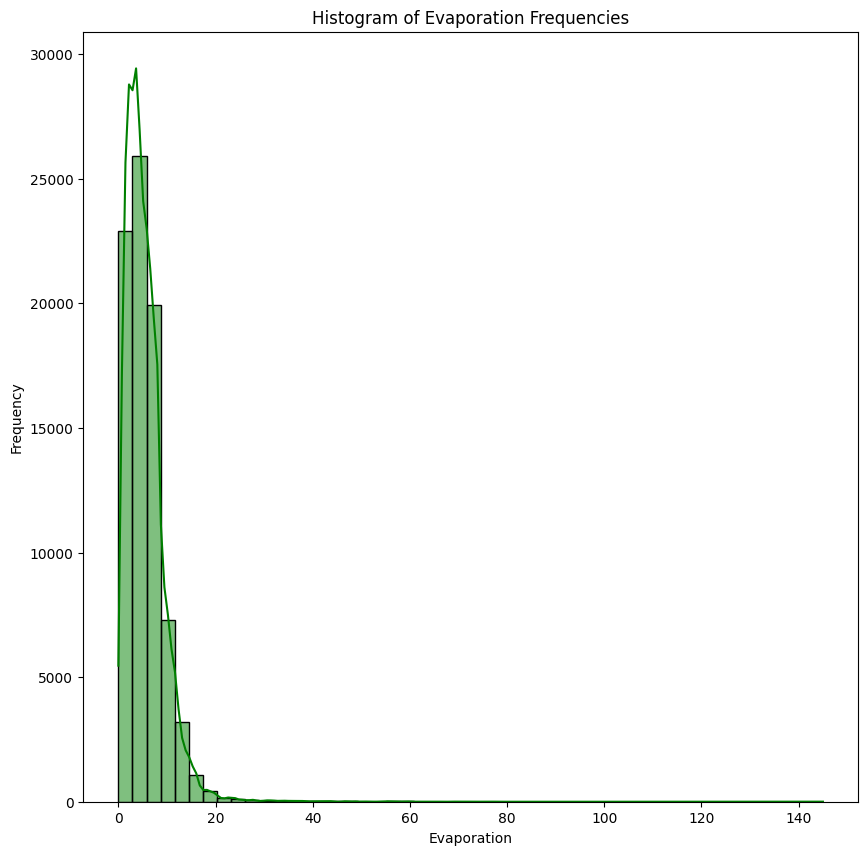

/tmp/ipykernel_12042/1866156094.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Evaporation'].fillna(data['Evaporation'].median(), inplace=True)


,Evaporation,RainTomorrow
0,4.8,No
1,4.8,No
2,4.8,No
3,4.8,No
4,4.8,No
...,...,...
142188,4.8,No
142189,4.8,No
142190,4.8,No
142191,4.8,No


In [8]:
# For Evaporation

plt.figure(figsize=(10, 10))
sns.histplot(data['Evaporation'], kde=True, color='green', bins=50)
plt.xlabel('Evaporation')
plt.ylabel('Frequency')
plt.title('Histogram of Evaporation Frequencies')
plt.show()

# Fill values for evaporation

data['Evaporation'].fillna(data['Evaporation'].median(), inplace=True)
data[['Evaporation', 'RainTomorrow']]

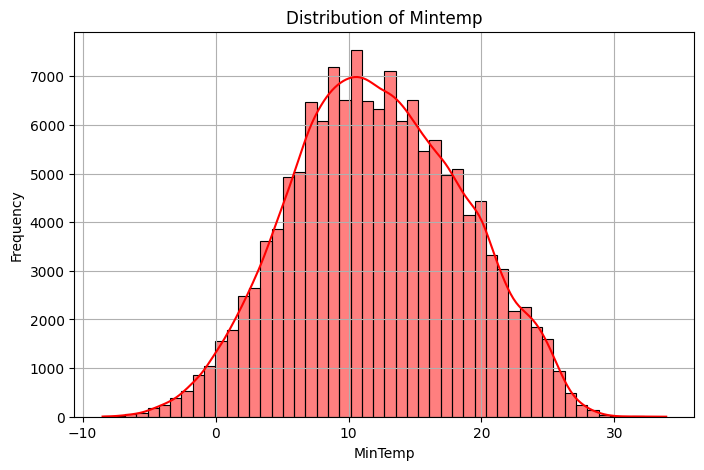

/tmp/ipykernel_12042/1690456955.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)


0         13.4
1          7.4
2         12.9
3          9.2
4         17.5
          ... 
142188     3.5
142189     2.8
142190     3.6
142191     5.4
142192     7.8
Name: MinTemp, Length: 142193, dtype: float64

In [9]:
# For MinTemperature 

plt.figure(figsize=(8, 5))
sns.histplot(data['MinTemp'], bins=50, kde=True, color='red')
plt.title('Distribution of Mintemp')
plt.xlabel('MinTemp')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fill missing vals of MinTemperature

data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
data['MinTemp']

In [10]:
# Fill rest of the null values and drop sunshine col

data['Pressure9am'].fillna(data['Pressure9am'].median(), inplace=True, )
data['Pressure3pm'].fillna(data['Pressure3pm'].median(), inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].median(), inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].median(), inplace=True)

data['MaxTemp'].fillna(data['MaxTemp'].median(), inplace=True)
data['Cloud9am'].fillna(data['Cloud9am'].median(), inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].median(), inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].median(), inplace=True)
data['Temp9am'].fillna(data['Temp9am'].median(), inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].median(), inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].median(), inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].median(), inplace=True)

data.drop('Sunshine', axis=1, inplace=True)

data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True)
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)


/tmp/ipykernel_12042/4167548528.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Pressure9am'].fillna(data['Pressure9am'].median(), inplace=True, )
/tmp/ipykernel_12042/4167548528.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [11]:
# Just create dummy columns for 'Location' column
dum_loc = pd.get_dummies(data['Location'])
dum_loc = dum_loc.astype(int)

# Join with original dataframe
data = pd.concat([data, dum_loc], axis=1)

# drop original location column
data.drop('Location', axis=1, inplace=True)

data

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,13.4,22.9,0.6,4.8,W,44.0,W,WNW,20.0,24.0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,25.1,0.0,4.8,WNW,44.0,NNW,WSW,4.0,22.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,4.8,WSW,46.0,W,WSW,19.0,26.0,...,0,0,0,0,0,0,0,0,0,0
3,9.2,28.0,0.0,4.8,NE,24.0,SE,E,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,W,41.0,ENE,NW,7.0,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.8,E,31.0,ESE,E,15.0,13.0,...,0,0,1,0,0,0,0,0,0,0
142189,2.8,23.4,0.0,4.8,E,31.0,SE,ENE,13.0,11.0,...,0,0,1,0,0,0,0,0,0,0
142190,3.6,25.3,0.0,4.8,NNW,22.0,SE,N,13.0,9.0,...,0,0,1,0,0,0,0,0,0,0
142191,5.4,26.9,0.0,4.8,N,37.0,SE,WNW,9.0,9.0,...,0,0,1,0,0,0,0,0,0,0


# Now using a LabelEncoder for Categorical Features / Columns

In [12]:
# finding out obj dtype columns

dtype = data.dtypes
dtype = dtype[dtype == 'object']

dtype

WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [13]:
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])

In [14]:
data['RainToday'].value_counts()

RainToday
0    110738
1     31455
Name: count, dtype: int64

# Training the logistic regression Model Now

In [15]:
dtype = data.dtypes
dtype = dtype[dtype == 'object']

dtype

Series([], dtype: object)

In [16]:
"""Dividing the features and Class """

X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']

Acuuracy is : 100.0 %
[[22098     0]
 [    0  6341]]


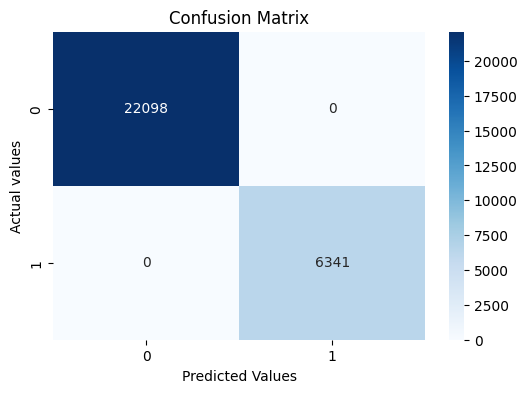

In [17]:
"""Training and Testing dataset split """

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

"""Linear Regression Model """

lgr = LogisticRegression(solver='liblinear')
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acuuracy is : {round(accuracy * 100, 2)} %")

conf = confusion_matrix(y_test, y_pred)
print(conf)

plt.figure(figsize=(6,4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix")
plt.show()